In [1]:
# Importación de paquetes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d
%matplotlib inline

C:\Users\marco\AppData\Local\Temp\ipykernel_15348\1865039913.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
# Función para aplicar suavizado con kernel gaussiano en una región específica
def apply_gaussian_smoothing(y, transition_index, sigma1, sigma2):
    y_smooth = np.copy(y)
    y_smooth[:transition_index+1] = gaussian_filter1d(y[:transition_index+1], sigma=sigma1, order=0)
    y_smooth[transition_index:] = gaussian_filter1d(y[transition_index:], sigma=sigma2, order=0)
    return y_smooth

In [3]:
# Importación de datos TG de Mica funcionalizada.
df1 = pd.read_csv('./nuevaCarpeta/Mica2_Er_TG.txt',sep='\t',header=None,names=['Temperatura','TG'], 
        usecols=['Temperatura','TG'])

In [4]:
x = df1["Temperatura"].values
y = df1["TG"].values

In [5]:
# Filtrado de datos.
df1.loc[df1["TG"]<=0].head(20)

,Temperatura,TG
0,18.40,0.000000
1,18.40,-0.000606
2,18.35,-0.000494
21,18.33,-0.000500
22,18.33,-0.000554
23,18.32,-0.000393
24,18.31,-0.000181
25,18.32,-0.000104
451,39.06,-0.002380
452,39.29,-0.005300


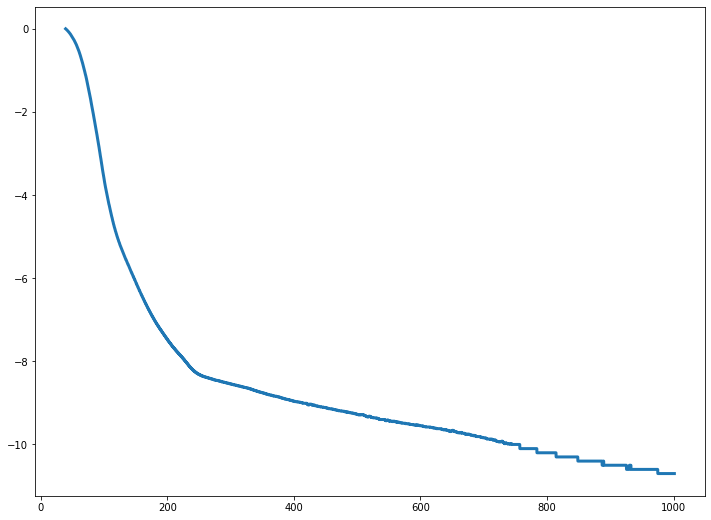

In [6]:
plt.figure(figsize=(12, 9))
plt.plot(x[451:], y[451:], linewidth=3, label="y")

In [7]:
x = x[451:]
y = y[451:]

In [8]:
# Interpolación de los puntos del eje x.
x_interpolated = np.linspace(x.min(), x.max(), len(x))
y_interpolated = interp1d(x, y)(x_interpolated)

In [9]:
def calculate_derivative(x, y):
    dx = np.gradient(x)   # Calcular el espaciado entre puntos en el eje x
    dy = np.gradient(y)   # Calcular la diferencia entre puntos en el eje y
    derivative = dy / dx  # Calcular la derivada punto por punto
    return derivative
#(x_interpolated, y_smooth)
derivative_raw = calculate_derivative(x_interpolated, y_interpolated)
print(derivative_raw)

[-0.01269565 -0.01251737 -0.01281059 ...  0.          0.
  0.        ]


In [10]:
temp = np.where(x_interpolated>400)[0][0]
temp

1595

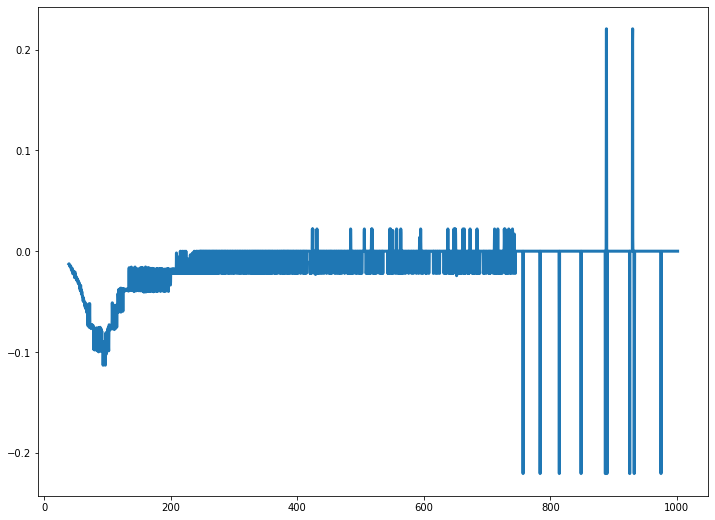

In [11]:
plt.figure(figsize=(12, 9))
plt.plot(x_interpolated[:], derivative_raw[:], linewidth=3, label="y_dev_smooth")

In [12]:
end_start = np.where(x_interpolated > 400)[0][0]  # Filtrado de datos
print(end_start)

1595


In [13]:
# Definir las regiones donde se aplicará el suavizado
transition_index = end_start

# Aplicar suavizado en cada región con diferentes parámetros
#y_smooth = apply_savgol_smoothing(y, transition_index, window_length1=60, polyorder1=2, window_length2=100, polyorder2=2)
#y_smooth = apply_gaussian_smoothing(y_interpolated, transition_index=end_start, sigma1=15, sigma2=50)

In [14]:
y_smooth = gaussian_filter1d(y_interpolated, sigma=15, order=0)
# ss.savgol_filter(y, window_length=200, polyorder=2)

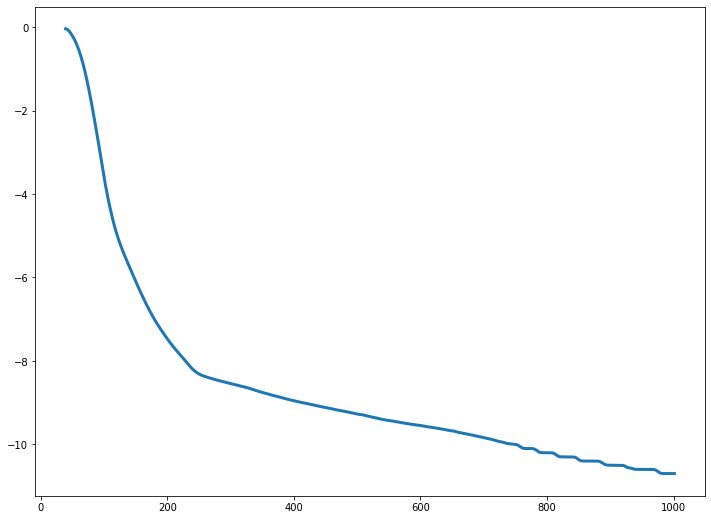

In [15]:
plt.figure(figsize=(12, 9))
plt.plot(x_interpolated, y_smooth, linewidth=3, label="y_smoothed")

In [16]:
derivative = calculate_derivative(x_interpolated, y_smooth)
print(derivative)

[-0.00092688 -0.00138882 -0.00230975 ...  0.          0.
  0.        ]


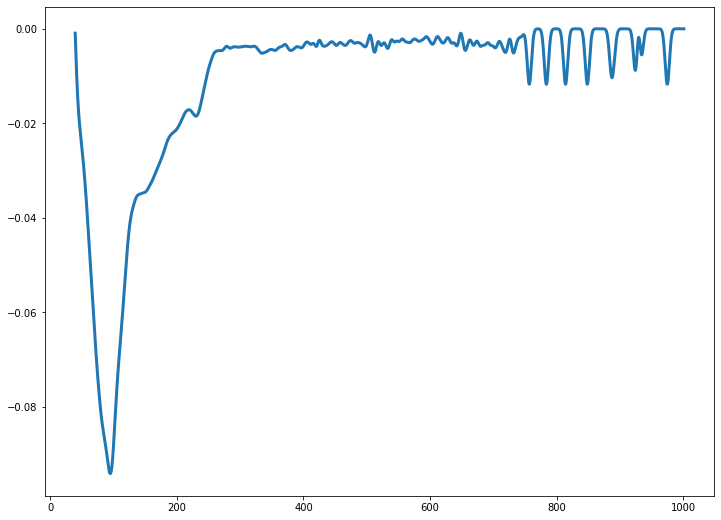

In [17]:
plt.figure(figsize=(12, 9))
plt.plot(x_interpolated, derivative, linewidth=3, label="y_dev_smooth")

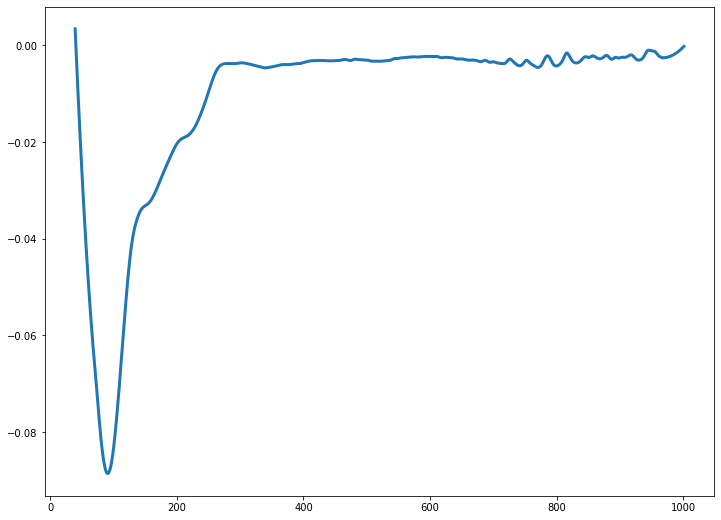

In [18]:
# Aplicación del filtro de suavizado con kernel gaussiano en la primera derivada.
y_dev_smooth = ss.savgol_filter(derivative,window_length=300,polyorder=2,deriv=0)
# gaussian_filter1d(derivative, sigma=31, order=0)
#ss.savgol_filter(derivative,window_length=50,polyorder=2,deriv=0)
plt.figure(figsize=(12, 9))
plt.plot(x_interpolated[:], y_dev_smooth[:], linewidth=3, label="y_dev_smooth")

In [28]:
a = np.where(x_interpolated > 39)[0][0]  # Filtrado de datos
print(a)

0


In [34]:
x_interpolated[0]

39.06

In [35]:
print(x_interpolated[0])
print(y_dev_smooth[0])

39.06
0.0033826895459133635


In [21]:
# Exportación de datos DTG de Mica-2 funcionalizada.
df2 = pd.DataFrame({"Temperatura":x,"TG_smooth":y_smooth,"TG_dev":y_dev_smooth})
df2.to_csv('./nuevaCarpeta/Mica2_Er_TG_smooth.txt',sep='\t',index=False,decimal=',')

In [22]:
#x_interpolated[:], derivative[:]
df3 = pd.DataFrame({"Temperatura":x,"DTG_raw":derivative_raw[:],"DTG_processed":y_dev_smooth})
df3.to_csv('./nuevaCarpeta/ejemploMicaFuncionalizada.txt',sep='\t',index=False,decimal=',')

In [39]:
b = np.where(x_interpolated>149)[0][0] #filtrado de datos
b

486

In [40]:
print(x_interpolated[b])
print(y_dev_smooth[b])

149.09497411764707
-0.033264297955296805


In [41]:
min_temp = np.where(y_dev_smooth == min(y_dev_smooth[a:b]))
print(x_interpolated[min_temp])
print(y_dev_smooth[min_temp])

[90.45493647]
[-0.08855878]


In [42]:
# Integración numérica con la regla trapezoidal.
resultado_original = np.trapz(y_dev_smooth[a:b],x_interpolated[a:b])
resultado_original

-6.053955596148286

In [43]:
# Cálculo del error
a_e = np.where(x>(x_interpolated[a]-0.1))[0][0]
b_e = np.where(x>(x_interpolated[b]+0.5))[0][0]
resultado_desplazado = np.trapz(y_dev_smooth[a_e:b_e], x_interpolated[a_e:b_e])
print("resultado desplazado:",resultado_desplazado)
error_integral = np.abs(resultado_original - resultado_desplazado)
print("error_integral:",error_integral)

resultado desplazado: -5.559898173689932
error_integral: 0.4940574224583534


In [45]:
c = np.where(x_interpolated>149)[0][0] #filtrado de datos
print(c)
print(x_interpolated[c])
print(y_dev_smooth[c])
d = np.where(x_interpolated>225)[0][0] #filtrado de datos
print(d)
print(x_interpolated[d])
print(y_dev_smooth[d])
# Integración numérica con la regla trapezoidal.
resultado_original = np.trapz(y_dev_smooth[c:d],x_interpolated[c:d])
print("resultado",resultado_original)
# Cálculo del error
c_e = np.where(x>(x_interpolated[c]-0.5))[0][0]
d_e = np.where(x>(x_interpolated[d]+0.5))[0][0]
resultado_desplazado = np.trapz(y_dev_smooth[c_e:d_e], x_interpolated[c_e:d_e])
print("resultado desplazado:",resultado_desplazado)
error_integral= np.abs(resultado_original - resultado_desplazado)
print("error_integral:",error_integral)

486
149.09497411764707
-0.033264297955296805
822
225.16853647058824
-0.01759322526591546
resultado -1.8711985070870432
resultado desplazado: -1.9929096533131525
error_integral: 0.12171114622610935


In [48]:
f = np.where(x_interpolated>225)[0][0] #filtrado de datos
print(f)
print(x_interpolated[f])
print(y_dev_smooth[f])
g = np.where(x_interpolated>292)[0][0] #filtrado de datos
print(g)
print(x_interpolated[g])
print(y_dev_smooth[g])
# Integración numérica con la regla trapezoidal.
resultado_original = np.trapz(y_dev_smooth[f:g],x_interpolated[f:g])
print("resultado",resultado_original)
# Cálculo del error
f_e = np.where(x>(x_interpolated[f]-0.5))[0][0]
g_e = np.where(x>(x_interpolated[g]+0.5))[0][0]
resultado_desplazado = np.trapz(y_dev_smooth[f_e:g_e], x_interpolated[f_e:g_e])
print("resultado desplazado:",resultado_desplazado)
error_integral= np.abs(resultado_original - resultado_desplazado)
print("error_integral:",error_integral)

822
225.16853647058824
-0.01759322526591546
1118
292.1857223529412
-0.003824384558243674
resultado -0.5581424963908216
resultado desplazado: -0.8838963100948709
error_integral: 0.3257538137040493
